<a href="https://colab.research.google.com/github/johnnypirolise/TCC/blob/main/jrTCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
%matplotlib inline

In [2]:
!git clone https://github.com/johnnypirolise/TCC
%cd TCC
!ls

Cloning into 'TCC'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.
/content/TCC
geral2.csv  geral.csv


In [3]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [4]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [5]:
def rede(i,j):
    clf = MLPRegressor(solver='lbfgs',activation='logistic',alpha=1e-5, hidden_layer_sizes=(i),random_state=j)
    return clf

In [6]:
Melhor=1e99
N=20 #i numero de neuronios
M=10 #j randm state seed
O=15 #k numero de vezes

In [9]:
DAT=pd.read_csv("geral2.csv")
print(DAT)

             x1        x2         x3      y1      y2            y3
0      15.00000  15.00000   20.00000  0.1124   378.5  8.000100e-04
1      15.00000  15.00000   21.00000  0.1083   396.8  7.000100e-04
2      15.00000  15.00000   22.00000  0.1044   415.1  6.000100e-04
3      15.00000  15.00000   23.00000  0.1008   433.3  5.000100e-04
4      15.00000  15.00000   24.00000  0.0974   451.5  5.000100e-04
...         ...       ...        ...     ...     ...           ...
60811  35.00001  30.00001  196.00001  0.0131  3507.0  1.000000e-08
60812  35.00001  30.00001  197.00001  0.0131  3525.0  1.000000e-08
60813  35.00001  30.00001  198.00001  0.0130  3543.0  1.000000e-08
60814  35.00001  30.00001  199.00001  0.0129  3561.0  1.000000e-08
60815  35.00001  30.00001  200.00001  0.0129  3579.0  1.000000e-08

[60816 rows x 6 columns]


In [13]:
for k in range(0,O):
  # leitura dos dados
  DAT=pd.read_csv("geral2.csv")

  # separa as colunas de interesse
  Index=[0,1,2,3,4,5]
  Dat_Select=[]
  Dat_Select=DAT.iloc[:,Index].copy()

  # separa os dados em normatizados e originais
  DAT_OLD=[]
  DAT_OLD=Dat_Select.copy()
  DAT=Normatiza(Dat_Select)
  
  # separa os dados em treino e teste
  train=[]
  test=[]
  train=DAT.sample(frac=0.8,random_state=k).copy()
  test=DAT.drop(train.index).copy()
  
  # obtem as variaveis independentes (treino e teste)
  x_train=train.iloc[:,[0,1,2]]
  x_test=test.iloc[:,[0,1,2]]
  X_OLD=DAT_OLD.iloc[:,[0,1,2]]

  # obtem as variaveis dependentes (treino e teste)
  Index=[4]
  y_train=train.iloc[:,Index]
  y_test=test.iloc[:,Index]
  Y_OLD=DAT_OLD.iloc[:,Index]
  test=Original(y_test,Y_OLD)
  resist_obs_test=[]
  resist_obs_train=[]
  resist_obs_test=test['y2'].copy()
  for i in range(1,N):
      for j in range(0,M):
          col_names=list(y_train)
          clf=rede(i,j)
          clf.fit(x_train, y_train)
          y_calc_train=[]
          y_calc_test=[]
          y_calc_train=clf.predict(x_train)
          y_calc_test=clf.predict(x_test)
          y_calc_train=pd.DataFrame(y_calc_train)
          y_calc_test=pd.DataFrame(y_calc_test)
          y_calc_train.columns = col_names
          y_calc_test.columns = col_names
          y_calc_train=Original(y_calc_train,Y_OLD)
          y_calc_test=Original(y_calc_test,Y_OLD)
          resist_calc_train=[]
          resist_calc_test=[]
          resist_calc_train=y_calc_train['y2'].copy()
          resist_calc_test=y_calc_test['y2'].copy()
          mse=mean_squared_error(resist_obs_test,resist_calc_test)
          R2_teste=r2_score(resist_obs_test,resist_calc_test)
          #print("Neuronios=",i,"Seed=",j,"MSE teste=",mse,"R^2 teste=",R2_teste)
          if(mse<Melhor):
              Melhor=mse.copy()
              ix=i
              jx=j
              R2r=R2_teste
              seed_sample = k
              resist_obs_train_top=Original(y_train,Y_OLD)
              resist_calc_train_top = resist_calc_train.copy()
              resist_obs_test_top = resist_obs_test.copy()
              resist_calc_test_top = resist_calc_test.copy()

mse=mean_squared_error(resist_obs_train_top,resist_calc_train_top)
R2=r2_score(resist_obs_train_top,resist_calc_train_top)

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599

In [15]:
print("\n Melhor resposta:")
print("Neuronios=",ix,"Seed=",jx,"Seed_sample",seed_sample,"MSE teste=",Melhor,"R^2 teste=",R2r,"MSE treino=",mse,"R^2 treino=",R2)


 Melhor resposta:
Neuronios= 2 Seed= 3 Seed_sample 10 MSE teste= 9.09887371153008 R^2 teste= 0.9999895643049531 MSE treino= 9.328724572176203 R^2 treino= 0.9999894605636853


In [16]:
resist_obs_train_top=pd.DataFrame(resist_obs_train_top)
resist_calc_train_top=pd.DataFrame(resist_calc_train_top)
resist_obs_test_top=pd.DataFrame(resist_obs_test_top)
resist_calc_test_top=pd.DataFrame(resist_calc_test_top)

In [17]:
print(resist_obs_train_top.head())
print(resist_calc_train_top.head())
print('====================================')
print(resist_obs_test_top.head())
print(resist_calc_test_top.head())

           y2
60654   695.8
26617   551.4
25702   365.0
21834  2416.0
19014   532.7
            y2
0   698.850685
1   554.117987
2   377.446274
3  2417.122792
4   536.880496
       y2
2   415.1
4   451.5
6   487.9
10  560.4
11  578.4
           y2
0  422.037766
1  457.045149
2  492.135049
3  562.548700
4  580.198374


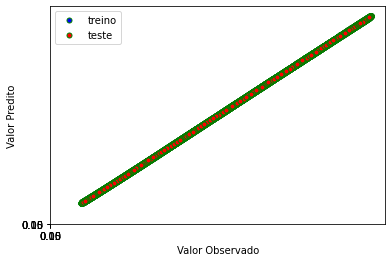

In [18]:
plt.plot(resist_obs_train_top, resist_calc_train_top,  color='green', linestyle='dashed', linewidth = 0, marker='o', markerfacecolor='blue', markersize=5, label='treino') 
plt.ylabel('Superior Calc')
plt.xlabel('Superior Obs')
plt.xticks(np.arange(0.0, 0.2, 0.05))
plt.yticks(np.arange(0.0, 0.2, 0.05))
plt.plot(resist_obs_test_top, resist_calc_test_top,  color='green', linestyle='dashed', linewidth = 0, marker='o', markerfacecolor='red', markersize=5, label='teste') 
plt.legend(loc='upper left')
plt.ylabel('Valor Predito')
plt.xlabel('Valor Observado')
plt.legend()
plt.xticks(np.arange(0.0, 0.2, 0.05))
plt.yticks(np.arange(0.0, 0.2, 0.05))
plt.show()